# LORA Finetuning Of Stable Diffusion Model on Kanji Dataset

In [1]:
#installing dependencies
!pip install -U --pre triton
!pip install -U xformers
!pip install accelerate transformers datasets
!pip install bitsandbytes
!pip install diffusers
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install peft
!pip install tensorboard
!pip install safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 353.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: triton
    Found existing installation: triton 3.0.0
    Uninstalling triton-3.0.0:
      Successfully uninstalled triton-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.4.1+cu124 requires triton==3.0.0; platform_system == "Linux" and platform_machine == "x86_64" and python_version < "3.13", but you have triton 3.1.0 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 205.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 267.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 394.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━

In [2]:
#installing the latest version of diffusers to mitigate errors

!pip uninstall -y diffusers
!pip install git+https://github.com/huggingface/diffusers.git

Found existing installation: diffusers 0.32.1
Uninstalling diffusers-0.32.1:
  Successfully uninstalled diffusers-0.32.1
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-mer162fd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-mer162fd
  Resolved https://github.com/huggingface/diffusers.git to commit b5726358cf125f2fa1a596dce321e91a225a57e4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3226307 sha256=8b8d535f1da89300ee2b5b641ed98a0b62e9f4debb7324d16b209100a302ae83
  Stored in directory: /tmp/pip-ephem-wheel-cache-mo_o5a6s/wheels/d2/5c/5f/16639722ea17ecb73ab461b81718584bac08af2801619786b9
Successfully built diffusers

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip insta

In [3]:
#upgrading the following libraries to mitigate errors
!pip install --upgrade transformers accelerate


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [4]:
#downloading the LoRA traning script
!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora.py

--2025-01-06 05:19:08--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [text/plain]
Saving to: ‘train_text_to_image_lora.py.1’

train_text_to_image 100%[===================>]  39.74K  --.-KB/s    in 0.002s  

2025-01-06 05:19:09 (22.3 MB/s) - ‘train_text_to_image_lora.py.1’ saved [40697/40697]



In [4]:
#logging into huggingface hub
from huggingface_hub import notebook_login
notebook_login()
     

In [5]:
!pip uninstall torchvision -y
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torchvision 0.19.1+cu124
Uninstalling torchvision-0.19.1+cu124:
  Successfully uninstalled torchvision-0.19.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 373.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 398.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 394.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: triton
    Found existing installation: triton 3.0.0
    Uninstalling triton-3.0.0:
      Successfully uninstalled triton-3.0.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.20.5
    Uninstalling nvidia-nccl-cu12-2.20.5:
      Successfully uninstalled nvidia-nccl-cu12-2.20.5
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1
    Uninstalling torch-

In [5]:
!pip install Pillow==9.5.0
!pip install wandb
!wandb login "f340645b62129aa7ab4ac34f2fa407814ccd3c91"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 206.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 318.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 429.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.29.post1 requires torch==2.5.1, but you have torch 2.4.1 which is incompatible.

[notice] A new release 

## Pushing The Kanji Dataset on HuggingFace  

In [8]:
import json
from pathlib import Path
from datasets import Dataset, Image, Features, Value
from PIL import Image as PILImage
import os
from huggingface_hub import login

def create_dataset(jsonl_file_path, image_dir):
    """
    Create a Huggingface dataset from images and metadata
    
    Args:
        jsonl_file_path (str): Path to the metadata JSONL file
        image_dir (str): Directory containing the image files
    
    Returns:
        datasets.Dataset: Huggingface dataset containing images and their text descriptions
    """
    # Read the JSONL file
    data = []
    with open(jsonl_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    
    # Prepare the dataset dictionary
    dataset_dict = {
        'image': [],
        'text': []
    }
    
    # Process each entry
    for entry in data:
        image_path = os.path.join(image_dir, entry['file_name'])
        
        # Check if image exists
        if os.path.exists(image_path):
            try:
                # Open and convert image to RGB (ensures consistency)
                with PILImage.open(image_path) as img:
                    # Convert to RGB and create a new image to ensure it's fully loaded
                    img_rgb = img.convert('RGB')
                    dataset_dict['image'].append(img_rgb)
                    dataset_dict['text'].append(entry['text'])
            except Exception as e:
                print(f"Error processing image {entry['file_name']}: {str(e)}")
        else:
            print(f"Warning: Image not found: {entry['file_name']}")
    
    # Define features
    features = Features({
        'image': Image(),  # Remove decode=True to use default handling
        'text': Value('string')
    })
    
    # Create the dataset
    dataset = Dataset.from_dict(dataset_dict, features=features)
    
    return dataset

def main():
    
    # Define paths
    jsonl_file_path = 'data/kanji_images/metadata.jsonl'
    image_dir = 'data/kanji_images/'
    
    # Create dataset
    print("Creating dataset...")
    dataset = create_dataset(jsonl_file_path, image_dir)
    
    # Save locally
    print("Saving dataset locally...")
    dataset.save_to_disk("image_text_dataset")
    
    # Push to Huggingface Hub
    print("Uploading dataset to Huggingface Hub...")
    dataset.push_to_hub(
        "rs545837/kanji-images",  # Replace with your desired repository name
        private=False  # Set to True if you want a private repository
    )
    
    # Print dataset information without trying to access the data
    print(f"\nDataset created with {len(dataset)} examples")
    print("Dataset features:", dataset.features)
    print("\nDataset has been uploaded to Huggingface Hub!")

if __name__ == "__main__":
    main()

Creating dataset...
Saving dataset locally...


Saving the dataset (0/1 shards):   0%|          | 0/7101 [00:00<?, ? examples/s]

Uploading dataset to Huggingface Hub...


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/7101 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/72 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/320 [00:00<?, ?B/s]


Dataset created with 7101 examples
Dataset features: {'image': Image(mode=None, decode=True, id=None), 'text': Value(dtype='string', id=None)}

Dataset has been uploaded to Huggingface Hub!


## Start The Training

In [ ]:
#This is the main training script
from PIL import ExifTags  # Import ExifTags separately

!accelerate launch --mixed_precision="no" --num_processes=1 --num_machines=1 --dynamo_backend="no" train_text_to_image_lora.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --dataset_name="rs545837/kanji-images" \
  --image_column="image" \
  --caption_column="text" \
  --resolution=256 \
  --random_flip \
  --train_batch_size=1 \
  --num_train_epochs=2 \
  --checkpointing_steps=500 \
  --learning_rate=1e-04 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --seed=42 \
  --output_dir="kanji-diffusion-v1-4" \
  --validation_prompt="kanji for Elon Musk" \
  --report_to="wandb" \
  --logging_dir="logs"

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.5.1+cu121 with CUDA 1201 (you have 2.4.1+cu121)
    Python  3.11.11 (you have 3.11.10)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
01/06/2025 10:09:31 - INFO - __main__ - Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

scheduler/scheduler_config.json: 100%|█████████| 313/313 [00:00<00:00, 2.28MB/s]
{'sample_max_value', 'prediction_type', 'thresholding', 'variance_type', 'timestep_spacing', 'clip_sample_range', 'rescale_betas_zero_snr', 'dynamic_thresholding_ratio'} was not found in config. Values will be initialized to default values.
tokenizer/tokenizer_config.json: 100%|█████████| 806/806 [00:00<00:00, 3.42MB/s]
tokenizer/v

## Pushing The Model On HuggingFace 

In [39]:
from huggingface_hub import HfApi, upload_folder
import os

# Initialize the Hugging Face API
api = HfApi()

# Directory containing your checkpoint (using checkpoint-1000 as an example)
checkpoint_dir = "kanji-diffusion-v1-4/checkpoint-7000"
repo_id = "rs545837/kanji-lora-256"

# Create repository (will not error if it already exists)
api.create_repo(repo_id=repo_id, exist_ok=True)

# Upload the folder
upload_folder(
    folder_path=checkpoint_dir,
    repo_id=repo_id,
    commit_message="Upload LoRA weights from checkpoint-7000",
)

print(f"Model uploaded to: https://huggingface.co/{repo_id}")

ValueError: Provided path: '/workspace/FakeKanji/kanji-diffusion-v1-4/checkpoint-7000' is not a directory

## Applying the LORA Weights

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Flag to control model loading
remote_model = False  # Set to True to load from HuggingFace Hub, False for local files

def load_model(use_remote=False):
    # Base model configuration
    model_id = "CompVis/stable-diffusion-v1-4"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    
    # LoRA weights configuration
    if use_remote:
        # Load from Hugging Face Hub
        remote_lora_path = "rs545837/kanji-lora"  # Your HuggingFace repo
        pipe.load_lora_weights(remote_lora_path)
    else:
        # Load from local path
        local_lora_path = "./kanji-diffusion-v1-4/checkpoint-7000/pytorch_lora_weights.safetensors"
        pipe.unet.load_attn_procs(local_lora_path)
    
    return pipe

# Load the model based on the flag
pipe = load_model(use_remote=remote_model)
print(f"Model loaded successfully from {'remote HuggingFace Hub' if remote_model else 'local files'}")

# Example usage:
# prompt = "Your prompt here"
# image = pipe(prompt).images[0]
# image.save("output.png")

In [58]:
# Defines a function to generate and display images based on text prompts
def generate_image(prompt, num_images=1, num_inference_steps=50):
    images = pipe(
        prompt,
        num_images_per_prompt=num_images,
        num_inference_steps=num_inference_steps
    ).images
    
    for i, image in enumerate(images):
        display(image)
        image.save(f"generated_image_{i}_steps_{num_inference_steps}.png")
        
    return images

  0%|          | 0/50 [00:00<?, ?it/s]

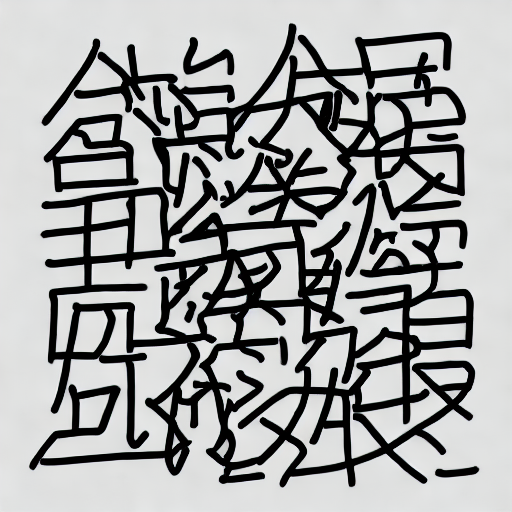

[<PIL.Image.Image image mode=RGB size=512x512>]

In [60]:
prompt = "tree"
generate_image(prompt, num_images=1,num_inference_steps=50)

## Comparison between both the models

In [80]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

def load_models():
    # Load base model without LoRA
    base_pipe = StableDiffusionPipeline.from_pretrained(
        "CompVis/stable-diffusion-v1-4", 
        torch_dtype=torch.float16
    ).to("cuda")
    
    # Load model with LoRA weights
    lora_pipe = StableDiffusionPipeline.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        torch_dtype=torch.float16
    ).to("cuda")
    
    if remote_model:
        lora_pipe.load_lora_weights("rs545837/kanji-lora")
    else:
        lora_pipe.unet.load_attn_procs("./kanji-diffusion-v1-4/pytorch_lora_weights.safetensors")
    
    return base_pipe, lora_pipe

def generate_comparison(prompt, seed=42):
    # Set seed for reproducibility
    generator = torch.Generator("cuda").manual_seed(seed)
    
    # Generate with base model
    base_image = base_pipe(
        prompt,
        num_inference_steps=30,
        generator=generator,
    ).images[0]
    
    # Generate with LoRA model using same seed
    generator = torch.Generator("cuda").manual_seed(seed)  # Reset generator
    lora_image = lora_pipe(
        prompt,
        num_inference_steps=30,
        generator=generator,
    ).images[0]
    
    # Create a side-by-side comparison
    combined_width = base_image.width * 2
    combined_height = base_image.height
    comparison_image = Image.new('RGB', (combined_width, combined_height))
    comparison_image.paste(base_image, (0, 0))
    comparison_image.paste(lora_image, (base_image.width, 0))
    
    return comparison_image

# Load both models
base_pipe, lora_pipe = load_models()
print("Both models loaded successfully")

# Test prompts
prompts = [
    "a beautiful kanji character for love",
    "a calligraphy of the kanji for peace",
    "an artistic rendering of the kanji for strength"
]

# Generate comparisons for each prompt
for i, prompt in enumerate(prompts):
    print(f"\nGenerating comparison for prompt: {prompt}")
    comparison = generate_comparison(prompt)
    comparison.save(f"comparison_{i}.png")
    print(f"Saved as comparison_{i}.png")
    print("Left: Original Model  |  Right: LoRA Fine-tuned Model")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Both models loaded successfully

Generating comparison for prompt: a beautiful kanji character for love


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Saved as comparison_0.png
Left: Original Model  |  Right: LoRA Fine-tuned Model

Generating comparison for prompt: a calligraphy of the kanji for peace


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved as comparison_1.png
Left: Original Model  |  Right: LoRA Fine-tuned Model

Generating comparison for prompt: an artistic rendering of the kanji for strength


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Saved as comparison_2.png
Left: Original Model  |  Right: LoRA Fine-tuned Model


In [81]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 325.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 403.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 369.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Create a figure with subplots for each comparison
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
fig.suptitle('Comparisons of Original vs LoRA Fine-tuned Model', fontsize=16)

for i in range(3):
    img = Image.open(f'comparison_{i}.png')
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(prompts[i], pad=10)

plt.tight_layout()
plt.show()